## Visualizing Tech Stocks

In this project I will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2023:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOGL)
* Meta (NASDAQ:META).

Using Pandas, yfinance, and Matplotlib, I will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2023.

In my analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [6]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the `yfinance` module as `yf`. (you can install the `yfinance` package by entering `pip3 install yfinance` in the command line or `!pip3 install yfinance` in the Jupyter Notebook)

You can learn more about the yfinance package by visiting its [github homepage](https://github.com/ranaroussi/yfinance#readme). Also take a look at the [dependency requirements](https://github.com/ranaroussi/yfinance#requirements) to check that your Python, Pandas, and Numpy versions are compatible for working with yfinance.

In [1]:
!pip3 install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/c9/1e/631c80e0f97aef46eb73549b9b0f60d94057294e040740f4cad0cb1f48e4/yfinance-0.2.65-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/93/d0/3d66be6d154e2bbb4d49445c557f722b248c019b70982654e2440f303671/frozendict-2.4.6-cp39-cp39-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 11.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for curl_cffi>=0.7 from https://files.pythonhosted.org/packages/cd/74/e63d74451dcd0a793da1983024f36bbe400e8a3be8eaf860c004f66d489a/curl_cffi-0.12.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for protobuf>=3.19.0 from https://files.py

In [7]:
import yfinance as yf

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2023 named `start_date` and a datetime object representing July 1st, 2023 named `end_date`.
#### Step 3: Retrieve Data
Call the function `yf.download()` to pull historical data for multiple stocks. `.download()` should take three arguments &mdash; the first is a positional argument that holds the list of stock symbols for which we'd like to download data. The second and third arguments should be keyword arguments `start` and `end`, which should be set to `start_date` and `end_date` respectively. Save the result to a variable called `stock_data`. You can read more about the `.download()` method on the [yfinance wiki](https://github.com/ranaroussi/yfinance/wiki/Tickers#download)
#### Step 4: View Data
View both `stock_data` and `stock_data['Close']`. What information is stored in these DataFrames?

In [13]:
symbols = ["MSFT", "AMZN", "AAPL", "GOOGL", "META"]
start_date = "2023-01-01"
end_date = "2023-07-01"
stock_data = yf.download(symbols, start=start_date, end=end_date)
stock_data

/var/folders/qc/vsxtnq_j59n7v7wsbvjz_jx80000gn/T/ipykernel_1763/2994469371.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbols, start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2023-01-03  123.470619   85.820000   88.588699  124.059387  234.808960   
2023-01-04  124.744133   85.139999   87.554901  126.675056  224.537674   
2023-01-05  123.421265   83.120003   85.686111  126.247398  217.882843   
2023-01-06  127.962425   86.080002   86.819313  129.310593  220.450684   
2023-01-09  128.485641   87.360001   87.495255  128.763596  222.597092   
...                ...         ...         ...         ...         ...   
2023-06-26  183.433395  127.330002  117.634499  276.950623  323.568604   
2023-06-27  186.195740  129.179993  117.624557  285.483795  329.447235   
2023-06-28  187.373947  129.039993  119.463531  283.733398  330.707611   
2023-06-29  187.710587  127.900002  118.389969  279.993958  329.919891   
2023-06-30  192.047180  130.360001  118.986389  285.414215  335.325836   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT  ...   
Date                                                                    ...   
2023-01-03  129.226060   86.959999   90.507194  125.680498  240.856088  ...   
2023-01-04  127.014724   86.980003   90.109579  128.345890  228.232587  ...   
2023-01-05  126.136098   85.419998   87.047947  127.818779  223.018497  ...   
2023-01-06  128.623856   86.400002   87.167233  129.618899  221.264157  ...   
2023-01-09  131.703962   89.480003   89.513159  132.224604  226.635056  ...   
...                ...         ...         ...         ...         ...  ...   
2023-06-26  186.185836  131.490005  121.272683  288.208866  330.963593  ...   
2023-06-27  186.522470  130.089996  118.370086  287.771264  331.003030  ...   
2023-06-28  188.017498  131.479996  119.672279  287.970134  332.805002  ...   
2023-06-29  188.185839  129.259995  119.344245  285.006468  330.963659  ...   
2023-06-30  192.552119  131.250000  120.358167  287.472898  337.482306  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2023-01-03  128.613993   85.459999   89.055891  122.149865  238.239260   
2023-01-04  125.267354   86.550003   89.811365  126.684996  227.654340   
2023-01-05  125.504283   85.330002   86.948545  125.441813  222.675461   
2023-01-06  124.398597   83.029999   86.272596  128.266319  218.559125   
2023-01-09  128.801557   87.459999   87.833232  130.444377  221.940436   
...                ...         ...         ...         ...         ...   
2023-06-26  184.977928  129.330002  120.040077  287.124817  328.610203   
2023-06-27  184.047253  128.630005  116.382010  280.471316  326.778708   
2023-06-28  186.067025  128.940002  116.391949  283.265962  329.535829   
2023-06-29  187.205648  128.770004  118.529134  282.947754  329.585101   
2023-06-30  189.730380  129.470001  119.453588  283.206326  332.578547   

Price          Volume                                          
Ticker           AAPL      AMZN     GOOGL      META      MSFT  
Date                                                           
2023-01-03  112117500  76706000  28131200  35528500  25740000  
2023-01-04   89113600  68885100  34854800  32397100  50623400  
2023-01-05   80962700  67930800  27194400  25447100  39585600  
2023-01-06   87754700  83303400  41381500  27584500  43613600  
2023-01-09   70790800  65266100  29003900  26649100  27369800  
...               ...       ...       ...       ...       ...  
2023-06-26   48088700  59989300  33969900  24232700  21520600  
2023-06-27   50730800  46801000  39535900  26108300  24354100  
2023-06-28   51216800  52149500  27091400  16722100  20259500  
2023-06-29   46347300  40761000  24090900  15395700

In [14]:
stock_data['Close']

Ticker,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2023-01-03,123.470619,85.820000,88.588699,124.059387,234.808960
2023-01-04,124.744133,85.139999,87.554901,126.675056,224.537674
2023-01-05,123.421265,83.120003,85.686111,126.247398,217.882843
2023-01-06,127.962425,86.080002,86.819313,129.310593,220.450684
2023-01-09,128.485641,87.360001,87.495255,128.763596,222.597092
...,...,...,...,...,...
2023-06-26,183.433395,127.330002,117.634499,276.950623,323.568604
2023-06-27,186.195740,129.179993,117.624557,285.483795,329.447235
2023-06-28,187.373947,129.039993,119.463531,283.733398,330.707611


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Closing Price Over Time"`. Set the graph title to `"Tech Stocks Price"`.

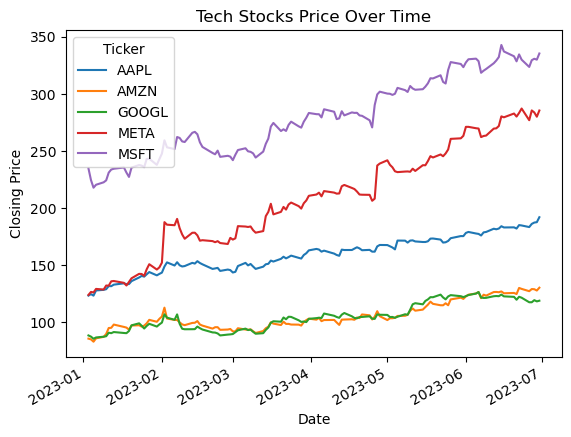

In [15]:
stock_data_closing_prices = stock_data['Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Tech Stocks Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

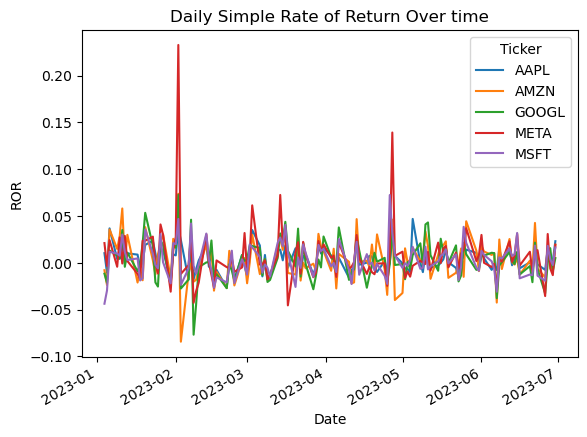

<Figure size 1600x900 with 0 Axes>

In [16]:
stock_data_daily_returns = stock_data['Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

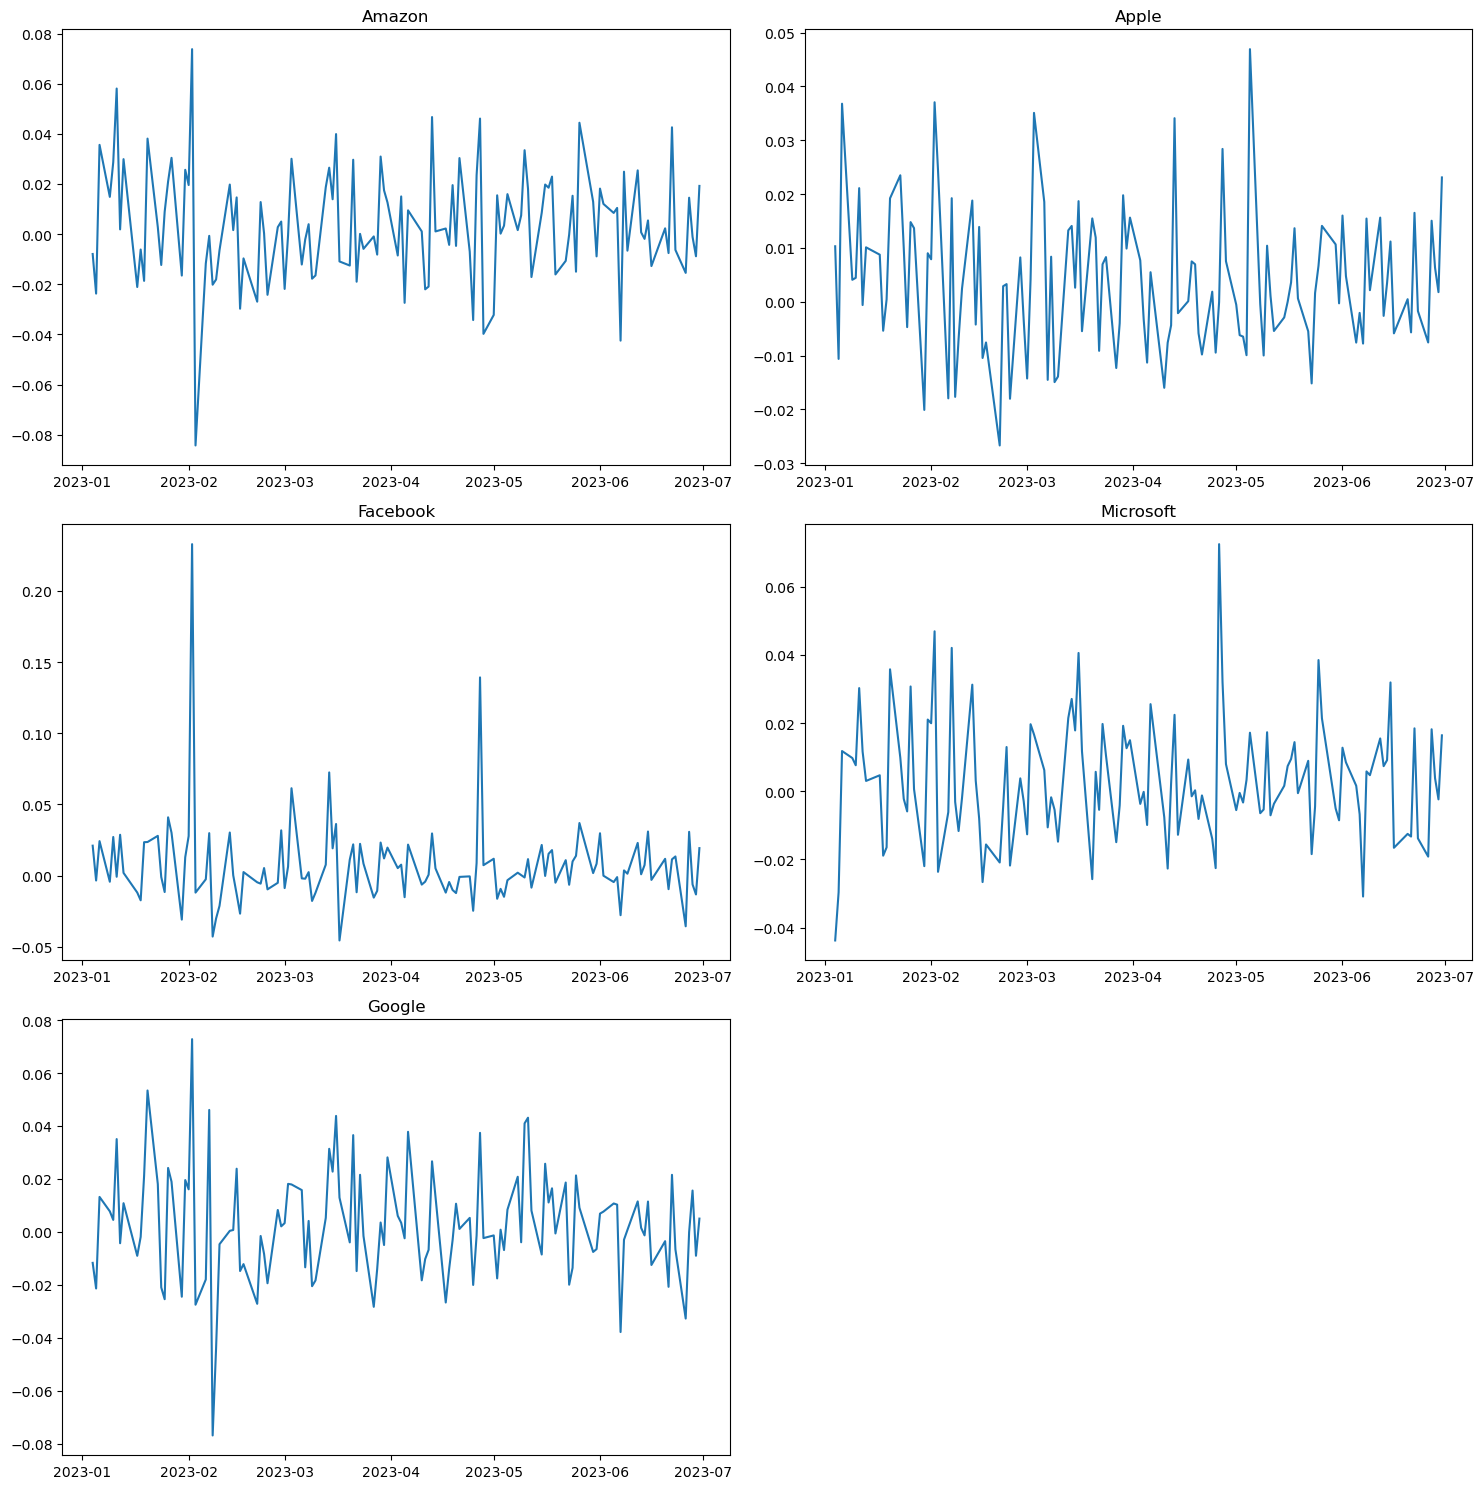

In [17]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Close']['META'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Close']['GOOGL'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately. 
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [18]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

daily_mean

Ticker
AAPL     0.003682
AMZN     0.003652
GOOGL    0.002619
META     0.007224
MSFT     0.003060
dtype: float64

In [17]:
# daily mean index for the x axis
daily_mean.keys()

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT'], dtype='object')

In [18]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.003681784004367271,
 0.0036520392611041766,
 0.0026190284268798655,
 0.007223537098665538,
 0.003060326292024291]

In [19]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

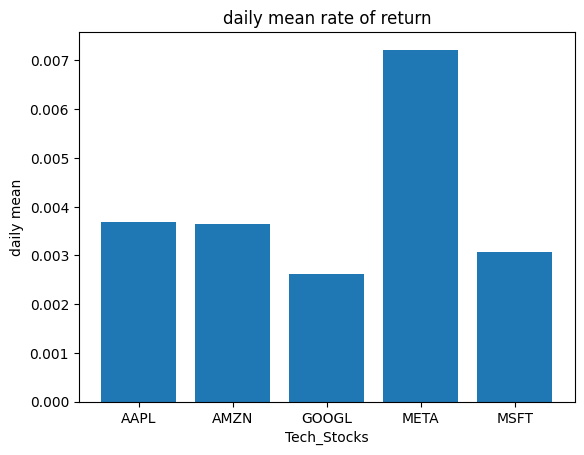

In [20]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

Meta has the highest mean simple rate of return over the period of data collected. Thus Meta would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately. 
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [21]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

AAPL     0.000171
AMZN     0.000500
GOOGL    0.000440
META     0.000931
MSFT     0.000324
dtype: float64

In [22]:
# variance index for the x axis
daily_var.keys()

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT'], dtype='object')

In [23]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.0001706907843177912,
 0.0004996417511013153,
 0.0004400438094504816,
 0.0009308602194809831,
 0.00032376356865185854]

In [24]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4])

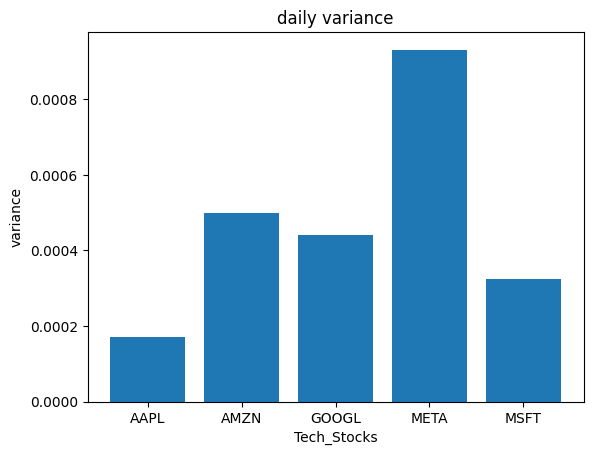

In [25]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

Meta shows the highest variance of all the stocks, indicating it can be a riskier investment. Apple shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately. 

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [26]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

AAPL     0.013065
AMZN     0.022353
GOOGL    0.020977
META     0.030510
MSFT     0.017993
dtype: float64

In [27]:
# standard deviation index for the x axis
daily_var.keys()

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT'], dtype='object')

In [28]:
# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.013064868323783107,
 0.02235266765067014,
 0.020977221204212956,
 0.03051000195806259,
 0.017993431263987936]

In [29]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4])

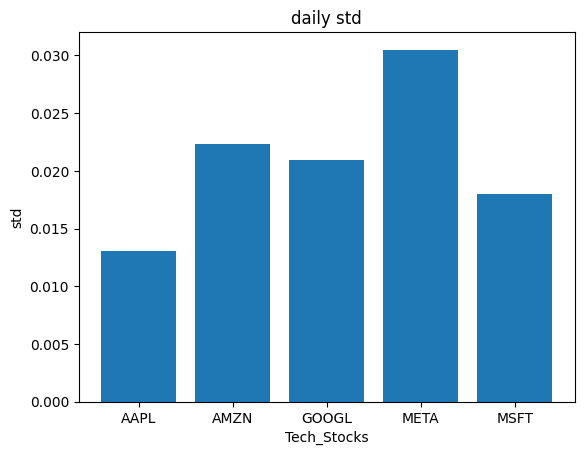

In [30]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

The answer to this question depends on your investment preferences. Meta is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Apple, on the other hand, is the least volatile stock, but has a lower mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [31]:
stock_data_daily_returns.corr()

,AAPL,AMZN,GOOGL,META,MSFT
AAPL,1.000000,0.555239,0.599271,0.578897,0.583447
AMZN,0.555239,1.000000,0.630500,0.578416,0.644662
GOOGL,0.599271,0.630500,1.000000,0.621096,0.628549
META,0.578897,0.578416,0.621096,1.000000,0.533364
MSFT,0.583447,0.644662,0.628549,0.533364,1.000000


None of the stocks are negatively correlated. Microsoft and Amazon have the highest correlation, while Meta and Microsoft exhibit the lowest correlation.